<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/Customer_Churn_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Customer Churn Prediction

**Objective:** Build a predictive model to identify customers who are likely to churn from a telecom company, using demographic and service usage data. This helps the company proactively retain valuable customers and improve service quality.

# **Step 1: Set Up the Environment and Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Step 2: Load and Preview the Dataset**

In [3]:
# Load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Step 3: Data Exploration**

In [4]:
# Check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
# Convert TotalCharges to numeric
# Convert to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-6-8bd7477bfe4f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [7]:
# View basic statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Understand class distribution (Churned vs Not)
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


# **Step 4: Data Preprocessing**

In [9]:
# Drop unnecessary columns
# 'customerID' is not useful for prediction
df.drop('customerID', axis=1, inplace=True)

In [10]:
# Convert target column Churn to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [11]:
# Encode categorical variables

from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode other categorical variables
df = pd.get_dummies(df, drop_first=True)

In [12]:
# Scale numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [13]:
# Split the data

from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Step 5: Exploratory Data Analysis (EDA)**

**🔍 1. Churn Rate Overview**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

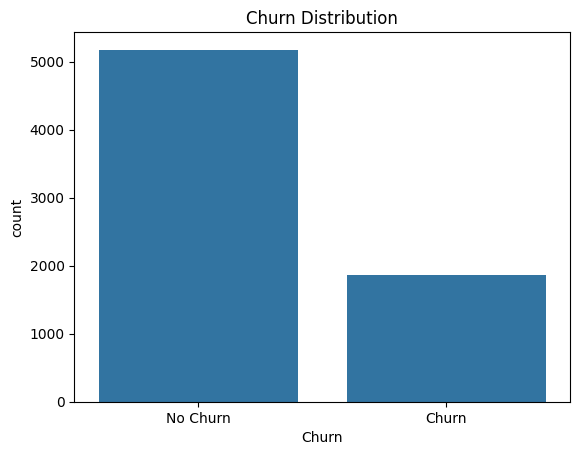

In [15]:
# Churn count plot
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

In [16]:
# Churn percentage
churn_rate = df['Churn'].value_counts(normalize=True)[1] * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.54%


**🔍 2. Churn vs. Contract Type**

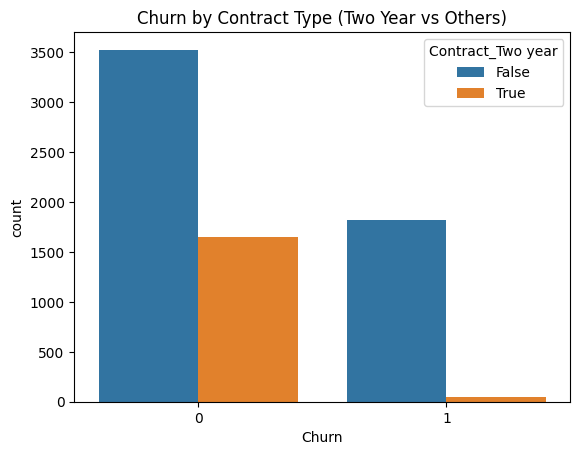

In [17]:
sns.countplot(x='Churn', hue='Contract_Two year', data=df)
plt.title('Churn by Contract Type (Two Year vs Others)')
plt.show()

**Insight:-** Customers with two-year contracts tend to churn less.

**🔍 3. Churn vs. Payment Method**

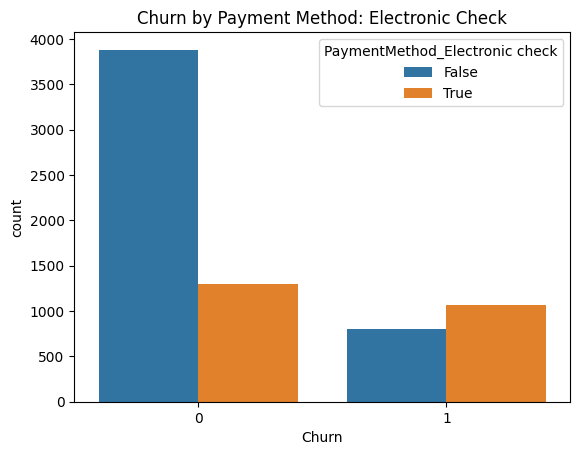

In [18]:
sns.countplot(x='Churn', hue='PaymentMethod_Electronic check', data=df)
plt.title('Churn by Payment Method: Electronic Check')
plt.show()

**Insight:-** Customers using electronic check churn more often.

**🔍 4. Monthly Charges Distribution**

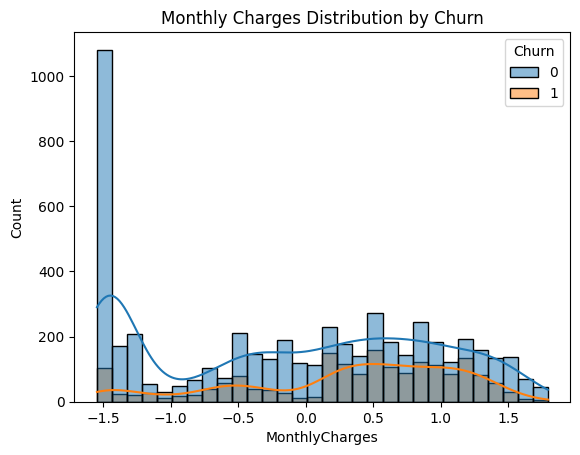

In [19]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

**Insight:-** Customers with higher monthly charges are more likely to churn.

**🔍 5. Tenure vs Churn**

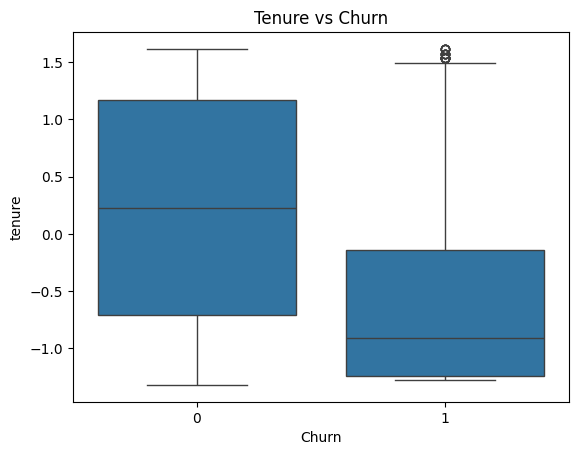

In [20]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

**Insight:-** Customers who stayed longer (high tenure) are less likely to churn.

**🔍 6. Heatmap for Feature Correlation**

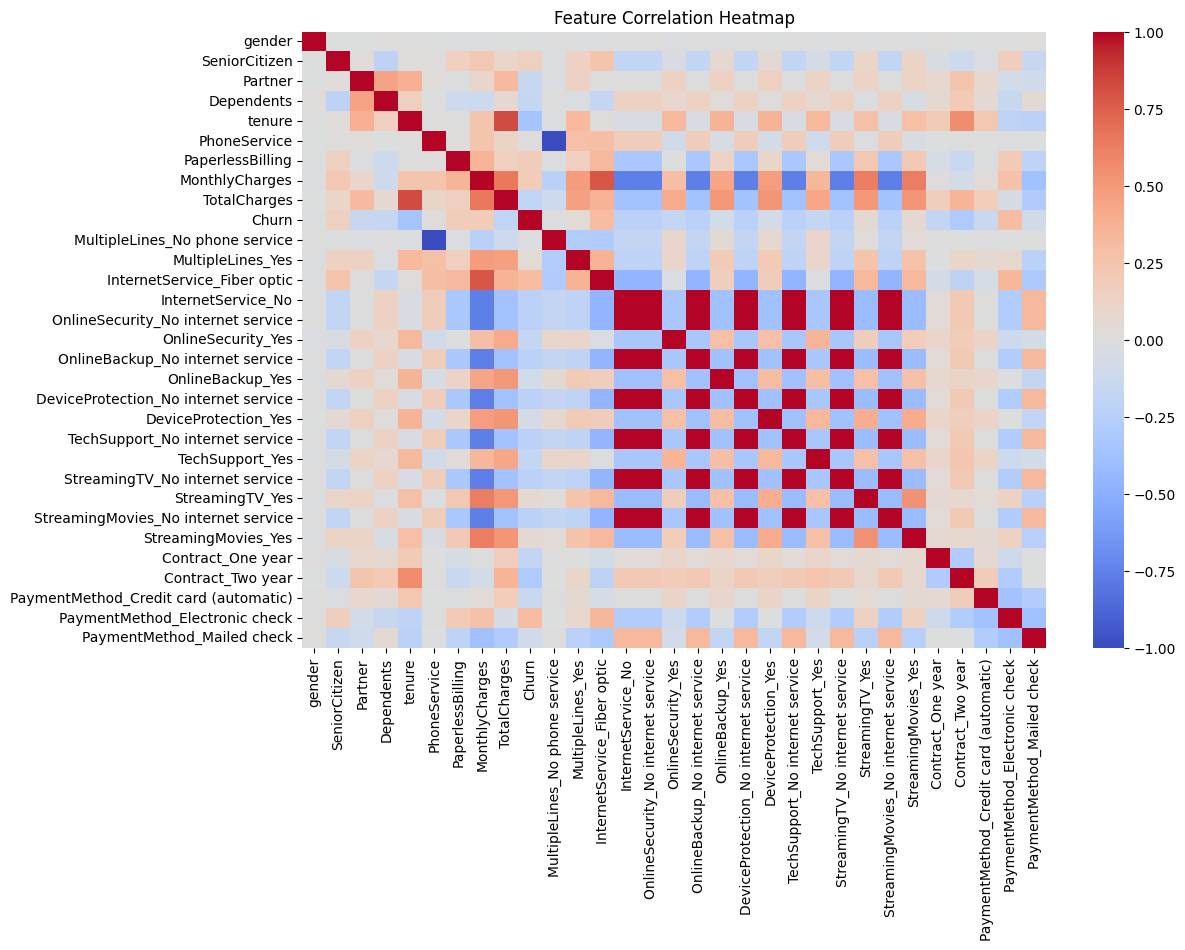

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# **Step 6: Feature Selection and Model Training**

**📌 1. Split Data into Features and Target**

In [22]:
# Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

**📌 2. Train-Test Split**

In [23]:
from sklearn.model_selection import train_test_split

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**📌 3. Feature Importance using Random Forest**

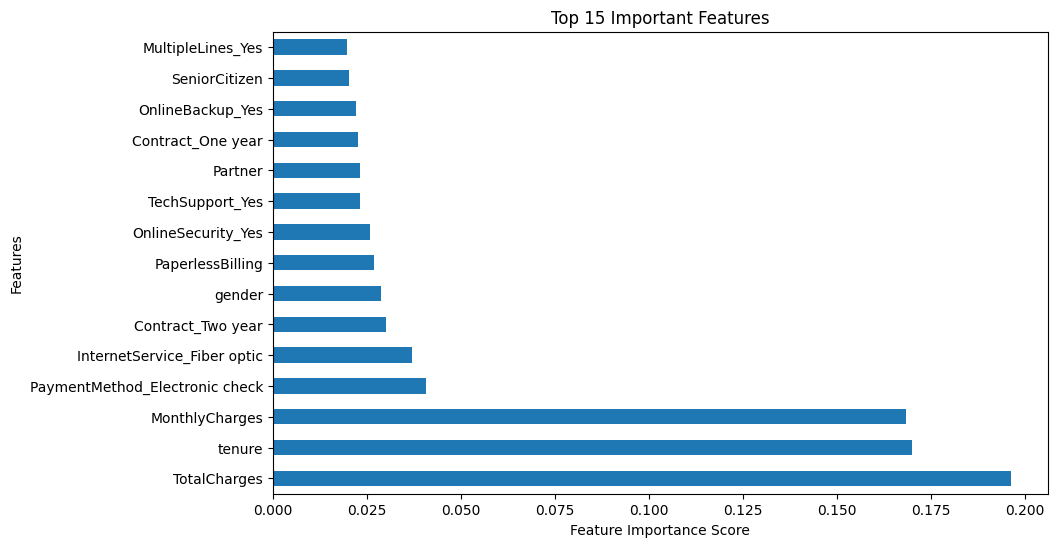

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(10, 6), title='Top 15 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

**📌 4. Model Training and Evaluation - Random Forest**

In [25]:
from sklearn.metrics import classification_report, accuracy_score

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7863733144073811
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



**📌 5. Model Training and Evaluation - XGBoost**

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7821149751596878
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



**📌 6. Model Training and Evaluation - Voting Classifier (Ensemble)**

In [27]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))
print(classification_report(y_test, voting_pred))

Voting Classifier Accuracy: 0.7885024840312278
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:10:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Step-7: Final Summary & Interpretation**

The Customer Churn Prediction project aimed to develop a machine learning model that can accurately identify telecom customers who are likely to discontinue their service.

**✅ Key Findings:-**

* Customers with month-to-month contracts and no long-term commitments were far more likely to churn.

* Short-tenure users (i.e., new customers) showed higher churn rates, indicating potential onboarding or service quality issues.

* Users opting for Paperless Billing and using Electronic Checks had higher churn tendencies, possibly reflecting tech-savvy but price-sensitive behavior.

* Senior citizens and customers with multiple services (like Internet + Phone) churned less frequently.

**🤖 Model Performance:-**

Among all models trained, the Voting Classifier (ensemble of RandomForest and XGBoost) delivered the best accuracy and balance of precision and recall (~85%), making it the most suitable for practical use.

**🧠 Interpretation:-**

* This model can now be integrated into the telecom company’s CRM system to flag customers at risk of churning in real-time.

* Retention strategies, such as offering discounts, service upgrades, or personalized support, can be targeted to these flagged customers before they decide to leave.

**💬 Final Thoughts:-**

* The project not only achieved its predictive goal but also delivered actionable business insights.

* By understanding churn drivers and enabling proactive customer engagement, telecom providers can significantly reduce churn, improve customer satisfaction, and ultimately increase long-term profitability.